In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("Used_Bikes.csv")
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [5]:
df.isnull().sum() #TO delete null  values
df.dropna(inplace=True)
df.isnull().sum()


bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [34]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)      #remove the duplicate value
df.duplicated().sum()


np.int64(0)

In [7]:
#cat_col-----num col
cat_col = df.select_dtypes(include='object')
cat_col.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [8]:
cat_col=df.drop(["bike_name","city"],axis=1) # feature selection
cat_col = cat_col.select_dtypes(include='object')
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [9]:
num_col = df.select_dtypes(exclude='object')
num_col.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [10]:
### cat---> num
# label encoding
# one hot encoding

In [11]:
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [12]:
#one hot encoding
pd.get_dummies(cat_col).astype(int).head()

,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
#label encoding---->ordinal encoding
cat_col['owner'].value_counts()



owner
First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: count, dtype: int64

In [14]:
dt ={
    "First Owner":1,
    "Second Owner":2,
    "Third Owner":3,
    "Fourth Owner Or More":4
}

In [15]:
cat_col["owner"]=cat_col["owner"].map(dt)

In [16]:
cat_col.head(10)

,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha
5,1,Yamaha
6,1,Honda
7,1,Hero
8,1,Royal Enfield
9,2,Royal Enfield


In [17]:
cat_col['brand'].value_counts()

brand
Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
Yezdi                  1
LML                    1
Name: count, dtype: int64

In [18]:
{i : key for key , i in enumerate(list(cat_col['brand'].unique()))}

{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [19]:
dt = {
    'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}


In [20]:
cat_col['brand'] = cat_col['brand'].map(dt)

In [21]:
cat_col.head()

,owner,brand
0,1,0
1,1,1
2,1,2
3,1,0
4,1,3


In [22]:
final_df = pd.concat([cat_col,num_col],axis=1)
final_df.head()

,owner,brand,price,kms_driven,age,power
0,1,0,35000.0,17654.0,3.0,110.0
1,1,1,119900.0,11000.0,4.0,350.0
2,1,2,600000.0,110.0,8.0,675.0
3,1,0,65000.0,16329.0,4.0,180.0
4,1,3,80000.0,10000.0,3.0,150.0


In [23]:
matrix = final_df.corr()
matrix

,owner,brand,price,kms_driven,age,power
owner,1.000000,-0.071885,-0.040164,-0.013661,0.292523,0.044031
brand,-0.071885,1.000000,0.394474,-0.029519,-0.050883,0.213429
price,-0.040164,0.394474,1.000000,-0.313955,-0.399133,0.862376
kms_driven,-0.013661,-0.029519,-0.313955,1.000000,0.484684,-0.264016
age,0.292523,-0.050883,-0.399133,0.484684,1.000000,-0.337035
power,0.044031,0.213429,0.862376,-0.264016,-0.337035,1.000000


<Axes: >

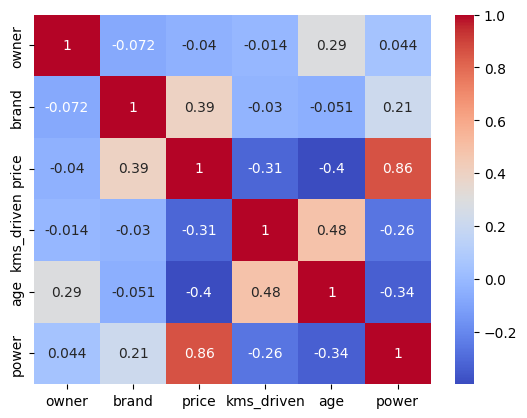

In [24]:
sns.heatmap(matrix,annot=True,cmap= 'coolwarm')

In [25]:
#divide the data into dependent and independent features
x= final_df.drop('price',axis=1)
y=final_df['price']

In [26]:
#training and testing
from sklearn.model_selection import  train_test_split
x_train,x_test, y_train,y_test = train_test_split(x, y ,
                                                  test_size=0.2,
                                                  random_state=42)


In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
lr.score(x_train,y_train)

0.8149843359281899

In [29]:
lr.score(x_test,y_test)

0.7808546293943684

In [30]:
#model evaluation
y_pred = lr.predict(x_test)
y_pred

array([ 12617.77757254,  26060.57737594,  21523.77299702, ...,
       485412.94126847,  51650.94939975,  92180.94726045], shape=(6530,))

In [31]:
#making a dataframe
df1 =pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
28994,18000.0,12617.777573
31433,43000.0,26060.577376
17250,10000.0,21523.772997
13738,14227.0,28583.859188
24577,87000.0,115457.785197
...,...,...
21858,20000.0,12132.884285
11813,25000.0,32255.540298
7033,670000.0,485412.941268
7406,46000.0,51650.949400


In [32]:
#model evaluation 
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 23060.041979110105
MSE: 1908636633.643595
RMSE: 43687.946090925296


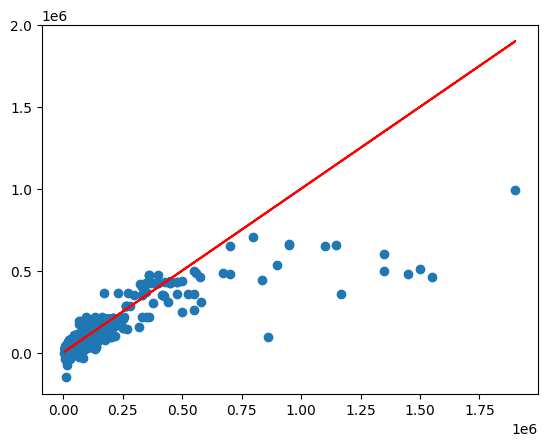

In [33]:
# import matplotlib.pyplot as plt
# sns.lineplot(y_test)
# plt.show()
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='red')